*1. How can the dataset be imported into a Jupyter notebook using the Pandas 
library?*

In [6]:
import pandas as pd  #imported pandas library and then uploaded our customer_data file;

data = pd.read_csv('/Users/ravisoni/Documents/customer_data.csv')

In [8]:
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40.0,Female,66120.267939,8.0,Electronics,30.568601,No,5,Yes
1,20.0,Female,23579.773583,4.0,Home Goods,38.240097,No,5,No
2,27.0,Female,127821.306432,11.0,Home Goods,31.633212,Yes,0,Yes
3,24.0,Female,137798.623120,19.0,Beauty,46.167059,No,4,Yes
4,31.0,Female,99300.964220,19.0,Clothing,19.823592,No,0,Yes
...,...,...,...,...,...,...,...,...,...
1495,39.0,Female,65048.141834,13.0,Electronics,34.590743,No,5,Yes
1496,67.0,Female,28775.331069,18.0,Home Goods,17.625707,No,1,Yes
1497,40.0,Female,57363.247541,7.0,Sports,12.206033,No,0,No
1498,63.0,Male,134021.775532,16.0,Home Goods,37.311634,Yes,0,Yes


*2. Should Supervised or Unsupervised Machine Learning techniques be used for 
analyzing this dataset?*

**As we have target columns or variables there like annual income and Discounts**

*3. If Supervised learning is appropriate, is this problem a Regression or 
Classification task?

**Here we will be using Regression to make prediction over the given continuous variable like age and gender data***

*4. How can the quality of the dataset be evaluated, including its shape, data types, 
and distribution?*

In [10]:
data.describe()  #It is describing the dataset;

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,DiscountsAvailed
count,1495.000000,1495.000000,1495.000000,1495.000000,1500.000000
mean,44.309699,84250.575795,10.418729,30.496235,2.555333
std,15.543686,37667.360933,5.892038,16.973948,1.705152
min,18.000000,20001.512518,0.000000,1.037023,0.000000
25%,31.000000,52847.266358,5.000000,16.227049,1.000000
50%,45.000000,83842.444820,11.000000,30.957377,3.000000
75%,57.000000,117167.772858,15.000000,44.373182,4.000000
max,70.000000,149785.176481,20.000000,59.991105,5.000000


In [12]:
data.shape  #This piece of code is giving us the shape means total rows and columns;

(1500, 9)

In [14]:
data.isnull().sum()  #Is is giving us the sum of the total missing values in our dataset according to the each columns;

Age                   5
Gender                0
AnnualIncome          5
NumberOfPurchases     5
ProductCategory       0
TimeSpentOnWebsite    5
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [16]:
data.dtypes  #Showing each columns datatypes;

Age                   float64
Gender                 object
AnnualIncome          float64
NumberOfPurchases     float64
ProductCategory        object
TimeSpentOnWebsite    float64
LoyaltyProgram         object
DiscountsAvailed        int64
PurchaseStatus         object
dtype: object

*5. What methods can be applied to identify and handle missing values in the 
dataset?*

data.isnull().sum()   #Identifying the missing values;

In [18]:
data.dropna(inplace=True)  #Removing the missing values, Dropping rown with missing values;

In [20]:
data.fillna(data.mean(numeric_only=True), inplace=True)  #Numeric value with mean and categorical value with median;
data.fillna(data.mode().iloc[0], inplace=True) #Filling the meaningful values as mean and median;

In [22]:
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

*6. What types of Exploratory Data Analysis (EDA) would be suitable for this 
dataset?*

In [24]:
import seaborn as sns   #imported seaborn and matplotlib for the visualisation;
import matplotlib.pyplot as plt

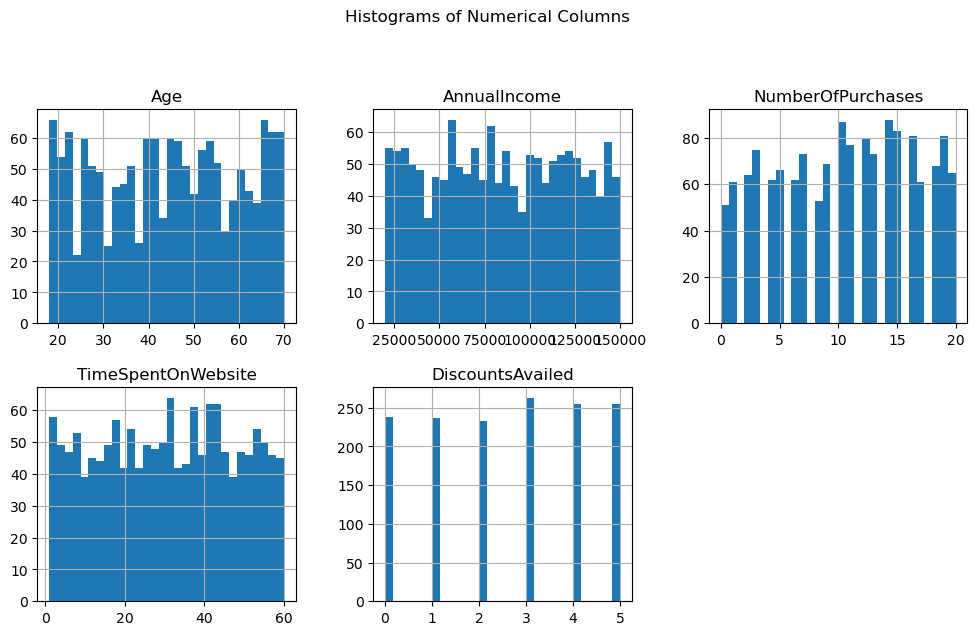

In [26]:
data.hist(bins=30, figsize=(12, 10), layout=(3, 3))    #histogram for the numerical features or columns.
plt.suptitle("Histograms of Numerical Columns")
plt.show()

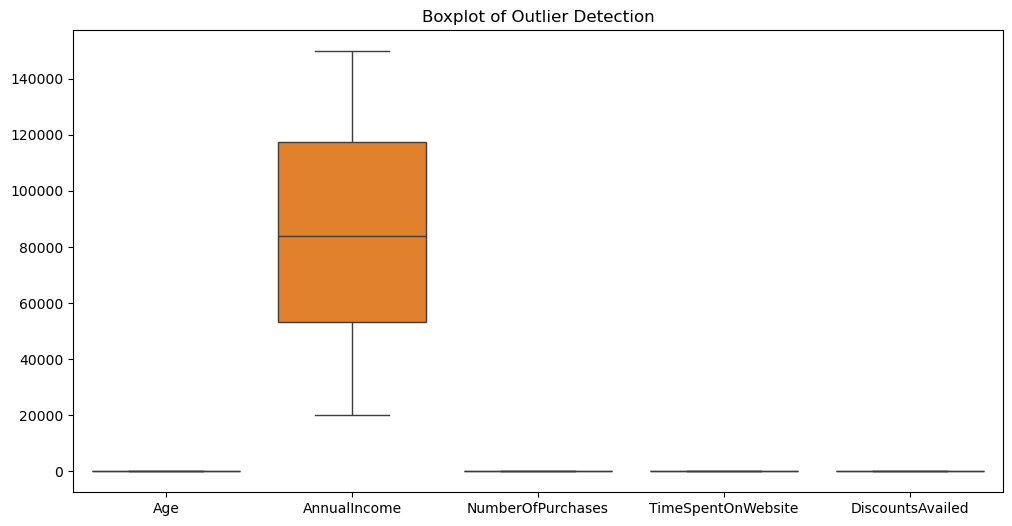

In [28]:
plt.figure(figsize=(12, 6))    #Here is the Bpxplot for outlier detection;
sns.boxplot(data=data, orient="v")
plt.title("Boxplot of Outlier Detection")
plt.show()

*7. What techniques can be used to detect and handle outliers in the dataset?*

In [30]:
import numpy as np    #imported numpy to do further analysis.

num_columns = data.select_dtypes(include=[np.number]).columns

In [32]:
Q1 = data[num_columns].quantile(0.25)  #Calculating IQR, Q1 and Q3
Q3 = data[num_columns].quantile(0.75)
IQR = Q3 - Q1

In [34]:
IQR   #Showed the Calculated IQR;

Age                      26.000000
AnnualIncome          64161.514332
NumberOfPurchases        10.000000
TimeSpentOnWebsite       28.118738
DiscountsAvailed          3.000000
dtype: float64

In [36]:
lower_bound = Q1 - 1.5 * IQR #Defining lower bound and upper bound;
upper_bound = Q3 + 1.5 * IQR

In [38]:
lower_bound #Lower bound calculated values of numeric columns;

Age                      -8.000000
AnnualIncome         -43144.159471
NumberOfPurchases       -10.000000
TimeSpentOnWebsite      -25.942000
DiscountsAvailed         -3.500000
dtype: float64

In [40]:
upper_bound #Upper bound calculated values of numeric columns;

Age                       96.000000
AnnualIncome          213501.897857
NumberOfPurchases         30.000000
TimeSpentOnWebsite        86.532954
DiscountsAvailed           8.500000
dtype: float64

In [42]:
filtered_data = data[~((data[num_columns] < lower_bound) | (data[num_columns] > upper_bound)).any(axis=1)] #Filtering rows outliers or handling outliers;

In [44]:
filtered_data.shape  #this is showing the dataset's shape after handling outliers of theirs;

(1480, 9)

*8. If categorical variables are present, how can they be encoded for modeling 
purposes?*

In [46]:
from sklearn.preprocessing import LabelEncoder #imported Label Encoder ML model using sklearn;

label_enc = LabelEncoder()

In [48]:
category_col = data.select_dtypes(include=['object']).columns.tolist() #identifying the Categorical Columns;

In [50]:
data_encoded = pd.get_dummies(data, columns=category_col, drop_first=True) #encoded the nominal categorical variable;

In [52]:
data_encoded.head()  #Showing the top encoded dataset;

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,DiscountsAvailed,Gender_Male,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Goods,ProductCategory_Sports,LoyaltyProgram_Yes,PurchaseStatus_Yes
0,40.0,66120.267939,8.0,30.568601,5,False,False,True,False,False,False,True
1,20.0,23579.773583,4.0,38.240097,5,False,False,False,True,False,False,False
2,27.0,127821.306432,11.0,31.633212,0,False,False,False,True,False,True,True
3,24.0,137798.623120,19.0,46.167059,4,False,False,False,False,False,False,True
4,31.0,99300.964220,19.0,19.823592,0,False,True,False,False,False,False,True


*9. How can data scaling techniques, such as normalization or standardization, be 
applied to the dataset?*

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # imported ML models for the scalling methods;

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns  #For the numeric scalling;

In [56]:
numeric_cols

Index(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite',
       'DiscountsAvailed'],
      dtype='object')

In [64]:
scaler_z = StandardScaler()    #Applying the Z-score normalization;
data_z = data.copy()
data_z[numeric_cols] = scaler_z.fit_transform(data[numeric_cols])

In [66]:
scaler_minmax = MinMaxScaler()  #Applying minmax scalling;
data_n = data.copy()
data_n[numeric_cols] = scaler_minmax.fit_transform(data[numeric_cols])

In [68]:
data_z.head() #Z-score top dataset;

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,-0.277332,Female,-0.485644,-0.411065,Electronics,0.003994,No,1.431761,Yes
1,-1.565225,Female,-1.615677,-1.091005,Home Goods,0.456685,No,1.431761,No
2,-1.114463,Female,1.153364,0.098890,Home Goods,0.066816,Yes,-1.499903,Yes
3,-1.307647,Female,1.418398,1.458770,Beauty,0.924450,No,0.845428,Yes
4,-0.856884,Female,0.395758,1.458770,Clothing,-0.630062,No,-1.499903,Yes


In [70]:
data_n.head() #MinMax Scalling top dataset;

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,0.423077,Female,0.355351,0.40,Electronics,0.500925,No,1.0,Yes
1,0.038462,Female,0.027571,0.20,Home Goods,0.631052,No,1.0,No
2,0.173077,Female,0.830766,0.55,Home Goods,0.518983,Yes,0.0,Yes
3,0.115385,Female,0.907642,0.95,Beauty,0.765512,No,0.8,Yes
4,0.250000,Female,0.611013,0.95,Clothing,0.318664,No,0.0,Yes


*10. How can the dataset be split into predictors (features) and the target variable 
(Purchase Status)?*

In [72]:
x = data.drop(columns=["PurchaseStatus"]) #Predictors
y = data["PurchaseStatus"] #Target Variable

In [74]:
x.shape

(1480, 8)

In [76]:
y.shape

(1480,)

*11. What is the best way to split the dataset into training and testing sets?*

In [78]:
from sklearn.model_selection import train_test_split #imported Training and testing model;

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [141]:
x_train.shape

(1184, 8)

In [145]:
x_test.shape

(296, 8)

In [147]:
y_train.shape

(1184,)

In [149]:
y_test.shape

(296,)

*12. Which machine learning models would be suitable for predicting customer 
purchase behavior?*

In [80]:
from sklearn.ensemble import RandomForestClassifier # imported ML Models to train and split the dataset accordingly;
from sklearn.metrics import accuracy_score, classification_report

In [92]:
label_enc = LabelEncoder() #Used label encoder again to encode the dataset of Categorical columns;
data["Gender"] = label_enc.fit_transform(data["Gender"])
data["ProductCategory"] = label_enc.fit_transform(data["ProductCategory"])
data["LoyaltyProgram"] = label_enc.fit_transform(data["LoyaltyProgram"])
data["PurchaseStatus"] = label_enc.fit_transform(data["PurchaseStatus"])

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Train_test_split

In [88]:
model = RandomForestClassifier(n_estimators=100, random_state=42) #Train Random Forest Classifier;
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'

In [90]:
pred_made = model.predict(x_test) #Made Predictions here;

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [190]:
pred_made

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

*13. How can the performance of the model be evaluated to determine its accuracy?*

In [196]:
accuracy = accuracy_score(y_test, pred_made) #Determing the accuracy;

In [198]:
accuracy

0.9459459459459459

*14. What techniques can be applied to improve the model's performance through 
hyperparameter tuning or advanced algorithms?*

In [3]:
from sklearn.model_selection import GridSearchCV  #Imported GridSearchCV to Use hyperparameter tuning;

param_grid = {     #Defining Parameter Grid
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [4]:
grid_searching = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_searching.fit(x_train, y_train)   # Performing Grid Search

NameError: name 'RandomForestClassifier' is not defined

**Model Performances**

In [209]:
grid_searching.best_score_   #(As i didnt know much about it so i took help from my old notes.)

0.9205964385325037